In [71]:
import pandas as pd
from pandas_profiling import ProfileReport as pp
import matplotlib.pyplot as plt
import re

In [72]:
df = pd.read_csv("/home/agustin/UPA/BigData/Trabajo Final Big Data/CUADRO 2.1.2.  PROYECCIÓN DE LA POBLACIÓN TOTAL DEL PAÍS POR ÁREA, SEGÚN GRUPOS DE EDAD. AÑO 2019.csv",sep=",")
df.rename(columns = {"TOTAL AREA":"AREA TOTAL"}, inplace = True)

In [73]:
total = int(df.iloc[0]["AREA TOTAL"])
total_urbano= int(df.iloc[0]["AREA URBANA"])
total_rural= int(df.iloc[0]["AREA RURAL"])

In [74]:
df = df.drop(0)

In [75]:
distribuciones = [(total_urbano/total),(total_rural/total)]
etiquetas = ["Urbano","Rural"]

([<matplotlib.patches.Wedge at 0x7f7fb3c11b40>,
 [Text(-0.4092451650518699, 1.0210379008056791, 'Urbano'),
  Text(0.4092450694554001, -1.0210379391219726, 'Rural')],
 [Text(-0.2232246354828381, 0.556929764075825, '62.1%'),
  Text(0.22322458333930914, -0.5569297849756214, '37.9%')])

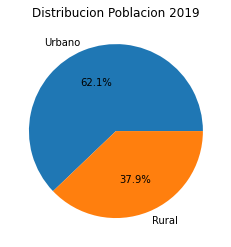

In [76]:
plt.title("Distribucion Poblacion 2019")
plt.pie(distribuciones, labels = etiquetas, autopct='%1.1f%%', shadow=False)
#plt.savefig("Distribucion Poblacion 2019.png")

In [77]:
df["GRUPOS DE EDAD"] = df["GRUPOS DE EDAD"].apply(lambda x:re.search(r"\s\d{1,2}\sa\s\d{1,2}|\s\d{1,2}\sanos y mas",x).group().strip())

In [78]:
df["GRUPOS DE EDAD"][17] = "80+"

/tmp/ipykernel_1050529/1335119364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GRUPOS DE EDAD"][17] = "80+"


In [79]:
df["PORCENTAJE AREA URBANO"]= df["AREA URBANA"]/df["AREA TOTAL"]
df["PORCENTAJE AREA RURAL"]= df["AREA RURAL"]/df["AREA TOTAL"]
df["PORCENTAJE AREA URBANO DEL TOTAL"] = df["AREA URBANA"]/total_urbano
df["PORCENTAJE AREA URBANA DEL TOTAL"] = df["AREA RURAL"]/total_rural
df

GRUPOS DE EDAD  AREA TOTAL  AREA URBANA  AREA RURAL  \
1           0 a 4      705443       408580      296863   
2           5 a 9      697710       402075      295634   
3         10 a 14      688660       401610      287049   
4         15 a 19      673810       414200      259610   
5         20 a 24      653159       424749      228410   
6         25 a 29      618331       413951      204380   
7         30 a 34      573132       379843      193289   
8         35 a 39      495579       321629      173950   
9         40 a 44      404880       259440      145441   
10        45 a 49      360060       228252      131809   
11        50 a 54      316826       198985      117841   
12        55 a 59      270811       168197      102614   
13        60 a 64      227286       139583       87702   
14        65 a 69      173649       105581       68068   
15        70 a 74      118435        71605       46830   
16        75 a 79       81021        48885       32137   
17            80+       93911        57109       36802   

    PORCENTAJE AREA URBANO  PORCENTAJE AREA RURAL  \
1                 0.579182               0.420818   
2                 0.576278               0.423720   
3                 0.583176               0.416823   
4                 0.614713               0.385287   
5                 0.650300               0.349700   
6                 0.669465               0.330535   
7                 0.662750               0.337250   
8                 0.648996               0.351004   
9                 0.640782               0.359220   
10                0.633928               0.366075   
11                0.628058               0.371942   
12                0.621086               0.378914   
13                0.614129               0.385866   
14                0.608014               0.391986   
15                0.604593               0.395407   
16                0.603362               0.396650   
17                0.608118               0.391882   

    PORCENTAJE AREA URBANO DEL TOTAL  PORCENTAJE AREA URBANA DEL TOTAL  
1                           0.091934                          0.109607  
2                           0.090470                          0.109153  
3                           0.090366                          0.105984  
4                           0.093199                          0.095853  
5                           0.095572                          0.084333  
6                           0.093143                          0.075461  
7                           0.085468                          0.071366  
8                           0.072369                          0.064225  
9                           0.058376                          0.053699  
10                          0.051359                          0.048666  
11                          0.044773                          0.043509  
12                          0.037846                          0.037887  
13                          0.031407                          0.032381  
14                          0.023757                          0.025132  
15                          0.016112                          0.017290  
16                          0.011000                          0.011866  
17                          0.012850                          0.013588

In [95]:
df.to_csv("./Segmentacion_Mercado.csv")